In [1]:
# ! curl http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data > ./data/ionosphere.data
# ! pip3 install umap-learn seaborn

In [2]:
import pandas
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
import umap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pandas.read_csv('./data/ionosphere.data', header=None) # Load data
#data = data[range(2, 34)] # Select valueable columns
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


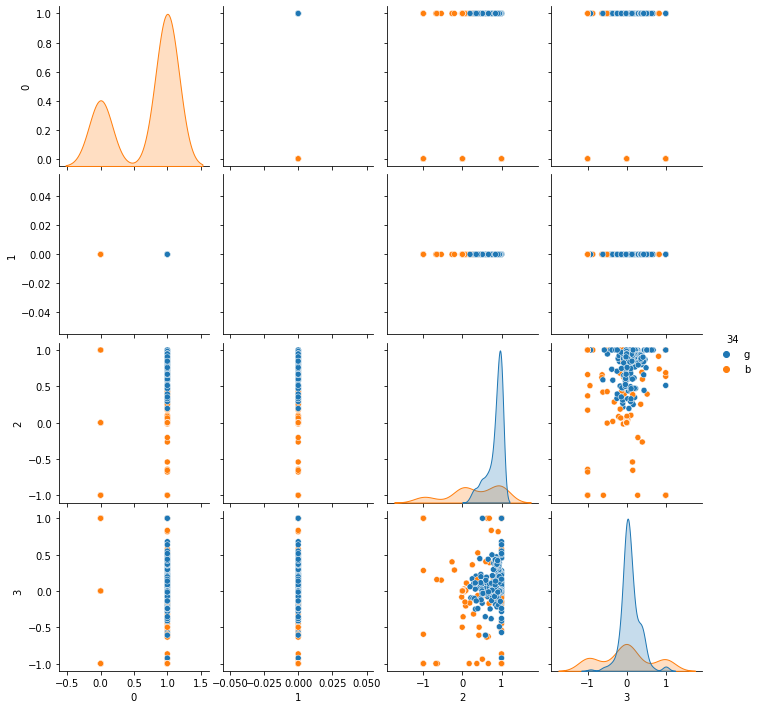

In [4]:
sns.pairplot(data[list(range(0, 4)) + [34]], hue=34)

In [5]:
umap_reducer = umap.UMAP()
tsne_reducer = TSNE(learning_rate='auto', init='random')

_data = data[range(0, 34)].values

standard_scaled_data = StandardScaler().fit_transform(_data)
umap_standard_embedding = umap_reducer.fit_transform(standard_scaled_data)
tsne_standard_embedding = tsne_reducer.fit_transform(standard_scaled_data)

robust_scaled_data = RobustScaler().fit_transform(_data)
umap_robust_embedding = umap_reducer.fit_transform(robust_scaled_data)
tsne_robust_embedding = tsne_reducer.fit_transform(robust_scaled_data)

minmax_scaled_data = MinMaxScaler().fit_transform(_data)
umap_minmax_embedding = umap_reducer.fit_transform(minmax_scaled_data)
tsne_minmax_embedding = tsne_reducer.fit_transform(minmax_scaled_data)

{ 
    "UMAP": (umap_standard_embedding.shape, umap_robust_embedding.shape, umap_minmax_embedding.shape),
    "TSNE": (tsne_standard_embedding.shape, tsne_robust_embedding.shape, tsne_minmax_embedding.shape)
}

{'UMAP': ((351, 2), (351, 2), (351, 2)),
 'TSNE': ((351, 2), (351, 2), (351, 2))}

In [6]:
# plt.scatter(umap_standard_embedding[:, 0], umap_standard_embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP, StandardScaler', fontsize=24)

In [7]:
# plt.scatter(umap_robust_embedding[:, 0], umap_robust_embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP, RobustScaler', fontsize=24)

In [8]:
# plt.scatter(umap_minmax_embedding[:, 0], umap_minmax_embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP, MinMaxScaler', fontsize=24)

In [9]:
# plt.scatter(tsne_standard_embedding[:, 0], tsne_standard_embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('TSNE, StandardScaler', fontsize=24)

In [10]:
# plt.scatter(tsne_robust_embedding[:, 0], tsne_robust_embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('TSNE, RobustScaler', fontsize=24)

In [11]:
# plt.scatter(tsne_minmax_embedding[:, 0], tsne_minmax_embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('TSNE, MinMaxScaler', fontsize=24)

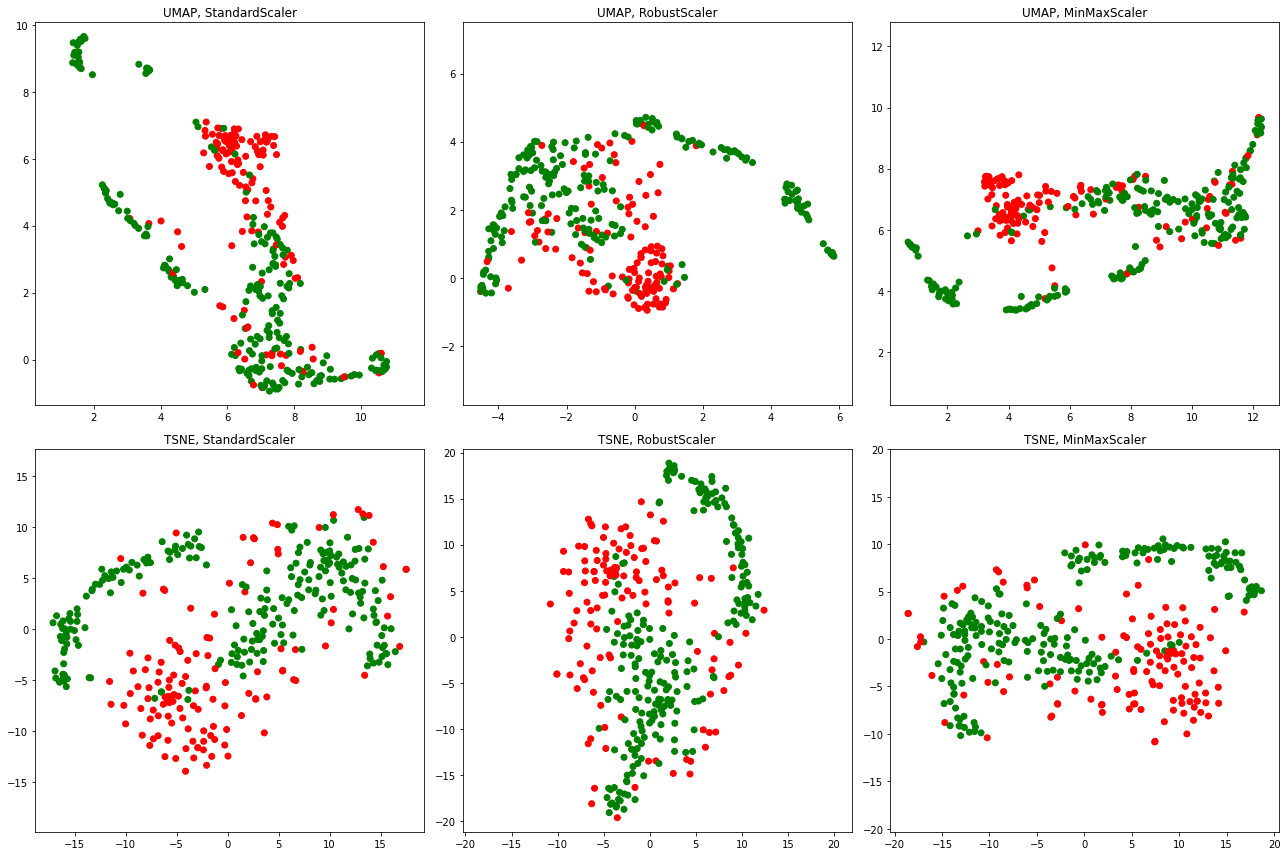

In [12]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].scatter(umap_standard_embedding[:, 0], umap_standard_embedding[:, 1], c=data[34].map({'g': "green", 'b': "red"}))
axs[0, 0].set_aspect('equal', 'datalim')
axs[0, 0].set_title('UMAP, StandardScaler')

axs[0, 1].scatter(umap_robust_embedding[:, 0], umap_robust_embedding[:, 1], c=data[34].map({'g': "green", 'b': "red"}))
axs[0, 1].set_aspect('equal', 'datalim')
axs[0, 1].set_title('UMAP, RobustScaler')

axs[0, 2].scatter(umap_minmax_embedding[:, 0], umap_minmax_embedding[:, 1], c=data[34].map({'g': "green", 'b': "red"}))
axs[0, 2].set_aspect('equal', 'datalim')
axs[0, 2].set_title('UMAP, MinMaxScaler')

axs[1, 0].scatter(tsne_standard_embedding[:, 0], tsne_standard_embedding[:, 1], c=data[34].map({'g': "green", 'b': "red"}))
axs[1, 0].set_aspect('equal', 'datalim')
axs[1, 0].set_title('TSNE, StandardScaler')

axs[1, 1].scatter(tsne_robust_embedding[:, 0], tsne_robust_embedding[:, 1], c=data[34].map({'g': "green", 'b': "red"}))
axs[1, 1].set_aspect('equal', 'datalim')
axs[1, 1].set_title('TSNE, RobustScaler')

axs[1, 2].scatter(tsne_minmax_embedding[:, 0], tsne_minmax_embedding[:, 1], c=data[34].map({'g': "green", 'b': "red"}))
axs[1, 2].set_aspect('equal', 'datalim')
axs[1, 2].set_title('TSNE, MinMaxScaler')

fig.set_figheight(12)
fig.set_figwidth(18)
fig.tight_layout()
